# Точний критерій Фішера
#### (Fisher's exact test)

[Точний тест Фішера](https://ru.wikipedia.org/wiki/Точный_тест_Фишера) - тест статистичної значущості, що використовується в аналізі таблиць сполученості для вибірок невеликих розмірів. Належить до точних тестів значущості, оскільки не використовує наближення великої вибірки (асимптотики при розмірі вибірки що прагне нескінченності).

Точні тести дозволяють отримувати акуратніший аналіз для маленьких вибірок або даних, які є рідкісними. Точні тести непараметричних досліджень - відповідний статистичний інструмент для роботи з неврівноваженими даними. Неврівноважені дані, проаналізовані асимптотичними методами, мають тенденцію до ненадійних результатів. Для великих і добре врівноважених наборів даних точні та асимптотичні оцінки ймовірностей дуже схожі. Але для маленьких, рідкісних, або виведених з рівноваги даних, точні та асимптотичні оцінки можуть бути дуже різними і навіть призвести до протилежних висновків щодо гіпотези, що розробляється

Потреба у тесті Фішера виникає, коли є дані, поділені на дві категорії двома окремими способами. Наприклад, вибірка підлітків може бути розділена на категорії з одного боку за ознакою статі (юнаки та дівчата), а з іншого боку – за ознакою перебування на дієті чи ні. Можна висунути гіпотезу, про те, що частка людей, які перебувають на дієті, вища серед дівчат, ніж серед юнаків, і ми хочемо переконатися, чи спостерігається якась статистично значуща різниця пропорцій.

Дані могли б бути схожими на такі:

групи|юнаки | дівчата | всього
----- |:-------:|:-------:|--------
на дієті| 1 |9 |10
не на дієті| 11 |3 |14
всього |12 |12 |24


Такі дані не підходять для аналізу методом $\chi^2$, тому що математичні очікування в таблиці все нижче 10, а в факторній таблиці розміру число ступенів свободи завжди дорівнює одному.

Питання, яке ми ставимо про ці дані: знаючи, що 10 із 24 підлітків — люди, які сидять на дієті, і що 12 із цих 24 — дівчата, яка ймовірність, що 10 дієтиків так нерівноцінно розподілені між статями? Якби ми вибрали 10 підлітків навмання, яка ймовірність, що 9 з них виявилися взятими з набору 12 осіб жіночої статі і лише 1 з 12 юнаків?

Перш ніж продовжити дослідження тесту Фішера, запровадимо необхідну нотацію. Позначимо числа в осередках літерами $\displaystyle a$, $\displaystyle b$, $\displaystyle c$ і $\displaystyle d$ відповідно, назвемо підсумки підсумовування рядками і стовпцями маргінальними (граничними) підсумками і представимо загальний підсумок літерою $\displaystyle n$.

групи|юнаки | дівчата | всього
----- |:-------:|:-------:|--------
на дієті| $a$ |$b$ |$a+b$
не на дієті| $c$ |$d$ |$c+d$
всього |$a + c$ |$b+d$ |$n$

Фішер показав, що можливість отримання будь-якого такого набору величин задається гіпергеометричним розподілом:

$$\displaystyle p={{{a+b} \choose {a}}{{c+d} \choose {c}}}\left/{{n} \choose {a+c}}\right.={\frac {(a+b)!\,(c+d)!\,(a+c)!\,(b+d)!}{n!\,a!\,b!\,c!\,d!}}$$

#### import librarries:

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
import math

In [21]:
f = lambda x: math.factorial(x)
a=1
b=9
c=11
d=3
n = a+b+c+d
p = (f(a+b)*f(c+d)*f(a+c)*f(b+d))/(f(n)*(f(a)*f(b)*f(c)*f(d)))
p

0.0013460761879122358

In [22]:
table = np.array([[1, 9], [11, 3]])
fisher_exact(table, alternative='less')

(0.030303030303030304, 0.0013797280926100418)

атрибут "alternative" визначає альтернативну гіпотезу. 
Доступні такі параметри :

* «two-sided»:(за замовчуванням) відношення шансів основної популяції не дорівнює одиниці.

* «less»: відношення шансів основної популяції менше одиниці.

* «greater»: відношення шансів основної популяції більше за одиницю

(0.030303030303030304, 0.0013797280926100418)
(0.030303030303030304, 0.0013797280926100418)


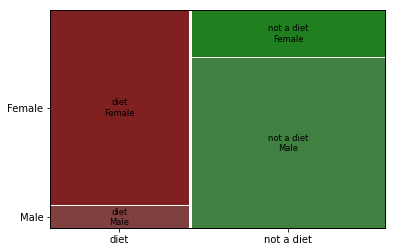

In [23]:
data = {('diet', 'Male'): 1,
             ('diet', 'Female'): 9,
             ('not a diet', 'Male'): 11,
             ('not a diet', 'Female'): 3,
            }
my_plot =  mosaic(data, gap=.009)
compare_diet = np.array([[data[('diet', 'Male')], data[('diet', 'Female')]],
                  [data[('not a diet', 'Male')], data[('not a diet', 'Female')]]])
compare_sex = np.array([[data[('diet', 'Male')], data[('not a diet', 'Male')]],
                  [data[('diet', 'Female')], data[('not a diet', 'Female')]]])
print(fisher_exact(compare_diet, alternative='less'))
print(fisher_exact(compare_sex, alternative='less')) # alternative='two-sided', ='greater', ='less'

# Приклад
Припустимо тестується деякий засіб:
взято 2 дослідні групи по 8 піддослідних в кожній, яких випробувували в певному тесті і отримали наступні результати: плацебо = (2,3,4,5,6,7,8,9) дослід = (7,8,9,10,11,12,13,14). 
припустимо, що при значенні <9 засіб не працює:

Group|Control | Drug | Total
----- |:-------:|:-------:|--------
Effective| $1$ |$6$ |$7$
Ineffective| $7$ |$2$ |$9$
Total |$8$ |$8$ |$16$

odds_ratio=0.047619047619047616 p_value=0.040559440559440565


(0.047619047619047616, 0.040559440559440565)

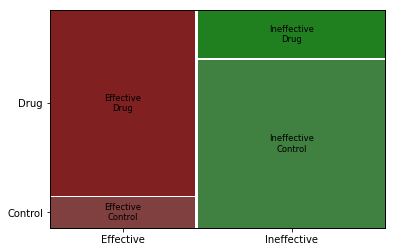

In [24]:
experiment = {('Effective', 'Control'): 1,
             ('Effective', 'Drug'): 6,
             ('Ineffective', 'Control'): 7,
             ('Ineffective', 'Drug'): 2,
            }
my_plot =  mosaic(experiment, gap=.009)
compare_effect = np.array([[experiment[('Effective', 'Control')], experiment[('Effective', 'Drug')]],
                  [experiment[('Ineffective', 'Control')], experiment[('Ineffective', 'Drug')]]])
compare_group = np.array([[experiment[('Effective', 'Control')], experiment[('Ineffective', 'Control')]],
                  [experiment[('Effective', 'Drug')], experiment[('Ineffective', 'Drug')]]])
odds_ratio, p_value = fisher_exact(compare_effect, alternative='two-sided')
print(f'{odds_ratio=} {p_value=}')
fisher_exact(compare_group, alternative='two-sided') # if 'less' Out: (odds_ratio=0.047619, p_value=0.0202797)

Відношення шансів (**odds_ratio**) - характеристика, що застосовується  для кількісного опису тісноти зв'язку ознаки А з ознакою Б в деякій статистичній популяції